# Problem 3.6

**Fundamentals of Solar Cells and Photovoltaic Systems Engineering**

**Solutions Manual - Chapter 3**

**Problem 3.6**

**Using the standard tabulated data (file “Reference_spectrum_ASTM-G173-03.csv” in the online repository of the book):**

**Using the provided Quantum Efficiency (QE), calculate the Spectral Response (SR) of a Silicon solar cell. Plot the QE and SR as a function of wavelength**

**(b) Estimate the photocurrent density generated by a silicon solar cell illuminated by the reference
spectrum AM1.5G.**

We will use the package [pandas](https://pandas.pydata.org/) to handle the data and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We start by importing the data.

In [2]:
datafile = pd.read_csv('data/Reference_spectrum_ASTM-G173-03.csv', index_col=0, header=0) 
datafile

,AM0,AM1.5G,AM1.5D
Wvlgth nm,Etr W*m-2*nm-1,Global tilt W*m-2*nm-1,Direct+circumsolar W*m-2*nm-1
280,8.20E-02,4.73E-23,2.54E-26
280.5,9.90E-02,1.23E-21,1.09E-24
281,1.50E-01,5.69E-21,6.13E-24
281.5,2.12E-01,1.57E-19,2.75E-22
...,...,...,...
3980,8.84E-03,7.39E-03,7.40E-03
3985,8.80E-03,7.43E-03,7.45E-03
3990,8.78E-03,7.37E-03,7.39E-03
3995,8.70E-03,7.21E-03,7.23E-03


In [3]:
datafile.drop(datafile.index[0], inplace=True) #remove row including information on units
datafile=datafile.astype(float) #convert values to float for easy operation
datafile.index=datafile.index.astype(float) #convert indexes to float for easy operation

We can plot the spectra.

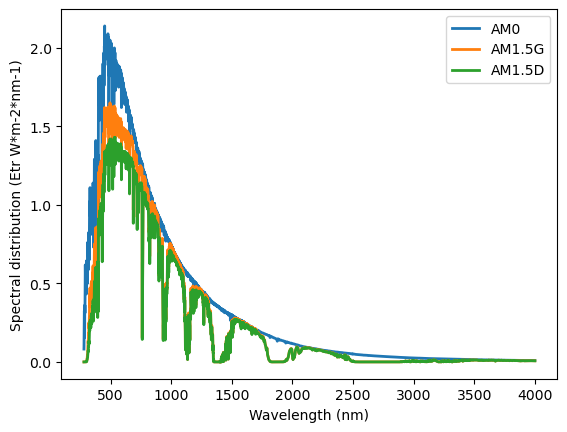

In [4]:
plt.plot(datafile, linewidth=2, label=datafile.columns)
plt.ylabel('Spectral distribution (Etr W*m-2*nm-1)')
plt.xlabel('Wavelength (nm)')
plt.legend()

We define the relevant constants. 

In [5]:
h=6.63*10**(-34) # [J·s] Planck constant
e=1.60*10**(-19) #C electron charge
c =299792458 #[m/s] Light speed

In [6]:
QE = pd.read_csv('data/QE_Silicon.csv', index_col=0, header=0) 
QE

,QE Silicon Solar cell
nm,
305,0.185579
310,0.243200
315,0.298992
320,0.353041
325,0.405425
...,...
1130,0.081951
1135,0.067769
1140,0.053712


We plot the Quantum Efficiency and Spectral Response

In [7]:
SR=pd.Series(index=QE.index,
            data=[QE.loc[i,'QE Silicon Solar cell']*e*i*0.000000001/(h*c) for i in QE.index])
SR

nm
305     0.045563
310     0.060689
315     0.075815
320     0.090941
325     0.106067
          ...   
1130    0.074545
1135    0.061918
1140    0.049290
1145    0.036663
1150    0.024036
Length: 170, dtype: float64

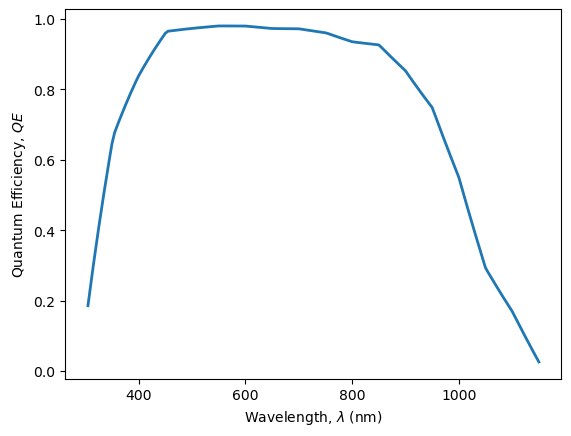

In [8]:
plt.plot(QE, 
         linewidth=2)
plt.ylabel('Quantum Efficiency, $QE$')
plt.xlabel('Wavelength, $\lambda$ (nm)');

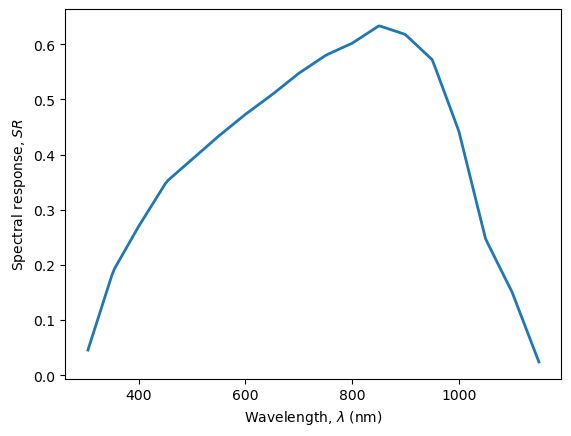

In [9]:
plt.plot(SR, 
         linewidth=2)
plt.ylabel('Spectral response, $SR$')
plt.xlabel(r'Wavelength, $\lambda$ (nm)');

***(c) Estimate the photocurrent generated by a Silicon solar cell illuminated by the reference spectrum AM1.5 G***

First, we need to interpolate the spectra at those datapoints included in the SR. 

In [10]:
spectra=datafile['AM1.5G']
spectra_interpolated=np.interp(SR.index, spectra.index, spectra.values)

Then, we calculate the photocurrent using Eq. 3.5.

$J=\int SR(\lambda) \cdot G(\lambda) \ d\lambda$

In [11]:
J = np.trapz([x*y for x,y in zip(SR, spectra_interpolated)], x=SR.index)*1000/10000 # A-> mA ; m2 -> cm2
print('Photocurrent density = ' + str(J.round(1)) + ' mA/cm2')

Photocurrent density = 36.7 mA/cm2
